In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import chi2_contingency, spearmanr, skew, pearsonr

from sklearn.metrics import r2_score
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score, classification_report, precision_recall_fscore_support
from sklearn.preprocessing import LabelEncoder, MinMaxScaler, StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import confusion_matrix
from sklearn.model_selection import ParameterGrid
from sklearn.neighbors import KNeighborsClassifier

#SMOTE
from imblearn.over_sampling import SMOTE

#Mô hình XG Boost
import xgboost as xgb
from xgboost import plot_importance
from sklearn.model_selection import RandomizedSearchCV

#Random Forest
from sklearn.ensemble import RandomForestClassifier

import joblib

**CHECKING**

In [3]:
data = pd.read_csv('/content/drive/MyDrive/Datasets/Diabetes Health Indicators Dataset/diabetes_binary_health_indicators_BRFSS2015.csv')

In [ ]:
#Lọc ra các hàng bị trùng lặp trong dữ liệu
duplicates = data[data.duplicated()]
print(duplicates.shape)

data = data.drop_duplicates()

(24206, 22)


In [ ]:
df0 = data[data['Diabetes_binary'] == 0]
df1 = data[data['Diabetes_binary'] == 1]

**GIẢI THÍCH DỮ LIỆU:**

**1.Diabetes_binary:** Đây là biến mục tiêu (target variable), cho biết liệu người tham gia có bị tiểu đường hay không (1: Có, 0: Không).

**2.HighBP:** Chỉ số về huyết áp cao. Giá trị 1 cho biết người tham gia có huyết áp cao, và 0 cho biết không có. ***(#)***

**3.HighChol:** Chỉ số về mức cholesterol cao. Giá trị 1 cho biết người tham gia có mức cholesterol cao, và 0 cho biết không có. ***(#)***

**4.CholCheck:** Cho biết liệu người tham gia có kiểm tra mức cholesterol trong 5 năm qua hay không. Giá trị 1 cho biết có kiểm tra, và 0 cho biết không.

**5.BMI:** Chỉ số khối cơ thể (Body Mass Index), được tính dựa trên cân nặng và chiều cao. Giá trị cao hơn cho biết người đó có nguy cơ béo phì. ***(#)***

**6.Smoker:** Cho biết liệu người tham gia có hút thuốc hay không. Giá trị 1 cho biết người đó là người hút thuốc, và 0 cho biết không hút thuốc. ***(#)***

**7.Stroke:** Cho biết liệu người tham gia có từng bị đột quỵ hay không. Giá trị 1 cho biết có đột quỵ, và 0 cho biết không. ***(#)***

**8.HeartDiseaseorAttack:** Cho biết liệu người tham gia có từng bị bệnh tim hoặc cơn đau tim hay không. Giá trị 1 cho biết có, và 0 cho biết không. ***(#)***

**9.PhysActivity:** Cho biết liệu người tham gia có hoạt động thể chất thường xuyên hay không. Giá trị 1 cho biết có hoạt động thể chất, và 0 cho biết không. ***(#)***

**10.Fruits:** Cho biết liệu người tham gia có ăn trái cây hàng ngày hay không. Giá trị 1 cho biết có, và 0 cho biết không. ***(#)***

**11.Veggies:** Cho biết liệu người tham gia có ăn rau củ hàng ngày hay không. Giá trị 1 cho biết có, và 0 cho biết không. ***(#)***

**12.HvyAlcoholConsump:** Cho biết liệu người tham gia có tiêu thụ lượng lớn rượu hay không (thường được định nghĩa là uống nhiều lần trong tuần hoặc mỗi ngày). Giá trị 1 cho biết có, và 0 cho biết không. ***(#)***

**13.AnyHealthcare:** Cho biết liệu người tham gia có bảo hiểm y tế hoặc tiếp cận dịch vụ chăm sóc sức khỏe hay không. Giá trị 1 cho biết có, và 0 cho biết không.

**14.NoDocbcCost:** Cho biết liệu người tham gia có bỏ qua việc gặp bác sĩ vì lý do chi phí hay không. Giá trị 1 cho biết có, và 0 cho biết không.

**15.GenHlth:** Đánh giá sức khỏe tổng quát của người tham gia theo một thang điểm từ 1 (rất tốt) đến 5 (rất kém). ***(#)***

**16.MentHlth:** Số ngày trong 30 ngày qua mà sức khỏe tinh thần của người tham gia không tốt.

**17.PhysHlth:** Số ngày trong 30 ngày qua mà sức khỏe thể chất của người tham gia không tốt.

**18.DiffWalk:** Cho biết liệu người tham gia có khó khăn khi đi bộ hay không. Giá trị 1 cho biết có khó khăn, và 0 cho biết không.

**19.Sex:** Giới tính của người tham gia (1: Nam, 0: Nữ).

**20.Age:** Nhóm tuổi của người tham gia. Thường được mã hóa thành các khoảng tuổi khác nhau. ***(#)***

**21.Education:** Mức độ giáo dục của người tham gia, thường được mã hóa thành các cấp độ khác nhau

**22.Income:** Mức thu nhập hàng năm của người tham gia, thường được mã hóa thành các mức khác nhau.

***Ở đây, ta sẽ tiến hành thanh lọc các giá trị nhiễu cho 2 dataframe df1, df0***

In [ ]:
def IQR_outlier(data):
  IQR_list = ['BMI']
  for i in IQR_list:
    Q1 = data[i].quantile(0.25)
    Q3 = data[i].quantile(0.75)
    IQR = Q3 - Q1

    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q3 + 1.5 * IQR
    data = data[(data[i] >= lower_bound) & (data[i] <= upper_bound)]
  print("Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:")
  print(data.shape)
  return data

In [ ]:
IQR_outlier(df0)

Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:
(187900, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,1.0,1.0,1.0,40.0,1.0,0.0,0.0,0.0,0.0,...,1.0,0.0,5.0,18.0,15.0,1.0,0.0,9.0,4.0,3.0
1,0.0,0.0,0.0,0.0,25.0,1.0,0.0,0.0,1.0,0.0,...,0.0,1.0,3.0,0.0,0.0,0.0,0.0,7.0,6.0,1.0
2,0.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,1.0,...,1.0,1.0,5.0,30.0,30.0,1.0,0.0,9.0,4.0,8.0
3,0.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,11.0,3.0,6.0
4,0.0,1.0,1.0,1.0,24.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,3.0,0.0,0.0,0.0,11.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253671,0.0,1.0,1.0,1.0,23.0,0.0,1.0,1.0,0.0,0.0,...,1.0,1.0,4.0,0.0,5.0,0.0,1.0,8.0,3.0,2.0
253672,0.0,1.0,0.0,1.0,30.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,12.0,2.0,1.0
253674,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,3.0,6.0,5.0
253677,0.0,0.0,0.0,1.0,28.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,2.0,5.0,2.0


In [ ]:
df0.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,194377.0,0.000000,0.000000,0.0,0.0,0.0,0.0,0.0
HighBP,194377.0,0.400536,0.490008,0.0,0.0,0.0,1.0,1.0
HighChol,194377.0,0.400505,0.490002,0.0,0.0,0.0,1.0,1.0
CholCheck,194377.0,0.953405,0.210770,0.0,1.0,1.0,1.0,1.0
BMI,194377.0,28.095855,6.503252,12.0,24.0,27.0,31.0,98.0
Smoker,194377.0,0.456155,0.498075,0.0,0.0,0.0,1.0,1.0
Stroke,194377.0,0.036095,0.186527,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,194377.0,0.081579,0.273722,0.0,0.0,0.0,0.0,1.0
PhysActivity,194377.0,0.751915,0.431902,0.0,1.0,1.0,1.0,1.0
Fruits,194377.0,0.617810,0.485924,0.0,0.0,1.0,1.0,1.0


In [ ]:
IQR_outlier(df1)

Dữ liệu sau khi loại bỏ Outliers sử dụng IQR:
(34244, 22)


,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
8,1.0,1.0,1.0,1.0,30.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,30.0,30.0,1.0,0.0,9.0,5.0,1.0
10,1.0,0.0,0.0,1.0,25.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,13.0,6.0,8.0
13,1.0,1.0,1.0,1.0,28.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,4.0,6.0
17,1.0,0.0,0.0,1.0,23.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,1.0,7.0,5.0,6.0
23,1.0,1.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,0.0,0.0,0.0,13.0,5.0,4.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
253659,1.0,0.0,1.0,1.0,37.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,0.0,6.0,4.0,1.0
253668,1.0,0.0,1.0,1.0,29.0,1.0,0.0,1.0,0.0,1.0,...,1.0,0.0,2.0,0.0,0.0,1.0,1.0,10.0,3.0,6.0
253670,1.0,1.0,1.0,1.0,25.0,0.0,0.0,1.0,0.0,1.0,...,1.0,0.0,5.0,15.0,0.0,1.0,0.0,13.0,6.0,4.0
253676,1.0,1.0,1.0,1.0,18.0,0.0,0.0,0.0,0.0,0.0,...,1.0,0.0,4.0,0.0,0.0,1.0,0.0,11.0,2.0,4.0


In [ ]:
df1.describe(include='all').T

,count,mean,std,min,25%,50%,75%,max
Diabetes_binary,35097.0,1.000000,0.000000,1.0,1.0,1.0,1.0,1.0
HighBP,35097.0,0.752344,0.431657,0.0,1.0,1.0,1.0,1.0
HighChol,35097.0,0.669459,0.470415,0.0,0.0,1.0,1.0,1.0
CholCheck,35097.0,0.993133,0.082582,0.0,1.0,1.0,1.0,1.0
BMI,35097.0,31.964242,7.380385,13.0,27.0,31.0,36.0,98.0
Smoker,35097.0,0.519218,0.499638,0.0,0.0,1.0,1.0,1.0
Stroke,35097.0,0.093113,0.290595,0.0,0.0,0.0,0.0,1.0
HeartDiseaseorAttack,35097.0,0.223837,0.416820,0.0,0.0,0.0,0.0,1.0
PhysActivity,35097.0,0.628515,0.483209,0.0,0.0,1.0,1.0,1.0
Fruits,35097.0,0.584238,0.492860,0.0,0.0,1.0,1.0,1.0


In [ ]:
data = pd.concat([df0, df1]).sample(frac=1).reset_index(drop=True)
data

,Diabetes_binary,HighBP,HighChol,CholCheck,BMI,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,...,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income
0,0.0,0.0,0.0,1.0,31.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,3.0,10.0,2.0,0.0,0.0,7.0,5.0,8.0
1,0.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,1.0,0.0,2.0,0.0,1.0,4.0,4.0,7.0
2,0.0,0.0,0.0,0.0,20.0,0.0,0.0,0.0,1.0,1.0,...,1.0,0.0,2.0,0.0,1.0,0.0,0.0,4.0,6.0,8.0
3,0.0,1.0,0.0,1.0,34.0,0.0,0.0,0.0,0.0,0.0,...,1.0,1.0,3.0,10.0,3.0,0.0,1.0,4.0,4.0,8.0
4,0.0,0.0,0.0,1.0,27.0,0.0,0.0,0.0,1.0,0.0,...,1.0,0.0,2.0,0.0,0.0,0.0,0.0,10.0,5.0,7.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229469,0.0,1.0,1.0,1.0,31.0,1.0,0.0,0.0,1.0,1.0,...,1.0,0.0,3.0,0.0,0.0,0.0,1.0,5.0,4.0,8.0
229470,1.0,0.0,0.0,1.0,26.0,1.0,0.0,0.0,0.0,1.0,...,1.0,0.0,5.0,0.0,30.0,0.0,1.0,13.0,3.0,4.0
229471,0.0,0.0,0.0,1.0,39.0,1.0,0.0,1.0,1.0,1.0,...,1.0,0.0,2.0,0.0,3.0,0.0,0.0,13.0,5.0,4.0
229472,1.0,0.0,1.0,1.0,20.0,1.0,0.0,0.0,1.0,0.0,...,1.0,0.0,4.0,0.0,0.0,0.0,1.0,8.0,4.0,7.0


**PREPROCESSING**

In [ ]:
#Hàm ánh xạ các giá trị BMI thành các khoảng.
def BMI_encoding(data):
    bins = [0, 18.5, 24.9, 29.9, float('inf')]
    labels = [1,2,3,4]

    data = (data.assign(BMI_bins = data.BMI.pipe(pd.cut, bins=bins, labels=labels)))
    data = data.drop(columns=['BMI'])
    return data

In [ ]:
data = BMI_encoding(data)
data

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,...,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
0,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,3.0,10.0,2.0,0.0,0.0,7.0,5.0,8.0,4
1,0.0,0.0,0.0,1.0,1.0,0.0,0.0,1.0,1.0,1.0,...,0.0,1.0,0.0,2.0,0.0,1.0,4.0,4.0,7.0,3
2,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,1.0,1.0,...,0.0,2.0,0.0,1.0,0.0,0.0,4.0,6.0,8.0,2
3,0.0,1.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,...,1.0,3.0,10.0,3.0,0.0,1.0,4.0,4.0,8.0,4
4,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0,0.0,1.0,...,0.0,2.0,0.0,0.0,0.0,0.0,10.0,5.0,7.0,3
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
229469,0.0,1.0,1.0,1.0,1.0,0.0,0.0,1.0,1.0,0.0,...,0.0,3.0,0.0,0.0,0.0,1.0,5.0,4.0,8.0,4
229470,1.0,0.0,0.0,1.0,1.0,0.0,0.0,0.0,1.0,0.0,...,0.0,5.0,0.0,30.0,0.0,1.0,13.0,3.0,4.0,3
229471,0.0,0.0,0.0,1.0,1.0,0.0,1.0,1.0,1.0,1.0,...,0.0,2.0,0.0,3.0,0.0,0.0,13.0,5.0,4.0,4
229472,1.0,0.0,1.0,1.0,1.0,0.0,0.0,1.0,0.0,1.0,...,0.0,4.0,0.0,0.0,0.0,1.0,8.0,4.0,7.0,2


**EDA**

**FEATURES SELECTION**

***Pearson Correlation để đo lường độ tuyến tính***

*Dễ thấy hầu hết columns đều có ít/không có tuyến tính với Output, vậy ta sẽ thiên về các mô hình Phi tuyến Classification*

In [ ]:
pearson_cols = data.columns
pearson_cols = pearson_cols.drop(['Diabetes_binary'])

for i in pearson_cols:
  corr, _ = pearsonr(data[i], data['Diabetes_binary'])
  print(f"Pearson Correlation of column {i}:", corr)

Pearson Correlation of column HighBP: 0.25431802481334387
Pearson Correlation of column HighChol: 0.19494410908595552
Pearson Correlation of column CholCheck: 0.07252338094085672
Pearson Correlation of column Smoker: 0.0455039891114246
Pearson Correlation of column Stroke: 0.0991932966698289
Pearson Correlation of column HeartDiseaseorAttack: 0.16821317327592394
Pearson Correlation of column PhysActivity: -0.1004043316220482
Pearson Correlation of column Fruits: -0.024805336132518285
Pearson Correlation of column Veggies: -0.04173376417288513
Pearson Correlation of column HvyAlcoholConsump: -0.06595001842697798
Pearson Correlation of column AnyHealthcare: 0.025331336307726597
Pearson Correlation of column NoDocbcCost: 0.020048275618897434
Pearson Correlation of column GenHlth: 0.27693981766901526
Pearson Correlation of column MentHlth: 0.054152678280602246
Pearson Correlation of column PhysHlth: 0.15621082600259756
Pearson Correlation of column DiffWalk: 0.20530218595977895
Pearson Cor

***Spearman Correlation cho các columns:***

In [ ]:
spearman_cols = data.columns
spearman_df = data[spearman_cols]
correlation_results = []

# Duyệt qua tất cả các cột trong DataFrame
for col in spearman_df.columns:
  if col == 'Diabetes_binary':
    continue
  else:
    if spearman_df[col].nunique() > 1:
      corr, p_value = spearmanr(spearman_df[col], spearman_df['Diabetes_binary'])
      correlation_results.append((col, corr, p_value))
    else:
        print(f"Cột {col} có giá trị không thay đổi và bị bỏ qua.")

# Chuyển kết quả thành DataFrame để dễ quan sát
correlation_df = pd.DataFrame(correlation_results, columns=['Feature', 'Spearman Correlation', 'p-value'])
correlation_df = correlation_df.sort_values(by='Spearman Correlation', ascending=False)
correlation_df

,Feature,Spearman Correlation,p-value
12,GenHlth,0.273110,0.000000e+00
0,HighBP,0.254318,0.000000e+00
15,DiffWalk,0.205302,0.000000e+00
20,BMI_bins,0.197471,0.000000e+00
1,HighChol,0.194944,0.000000e+00
17,Age,0.175375,0.000000e+00
5,HeartDiseaseorAttack,0.168213,0.000000e+00
14,PhysHlth,0.137043,0.000000e+00
4,Stroke,0.099193,0.000000e+00
2,CholCheck,0.072523,3.848806e-265


***Corr Matrix***

In [ ]:
corr = data.corr()
corr.style.background_gradient(cmap='coolwarm')

,Diabetes_binary,HighBP,HighChol,CholCheck,Smoker,Stroke,HeartDiseaseorAttack,PhysActivity,Fruits,Veggies,HvyAlcoholConsump,AnyHealthcare,NoDocbcCost,GenHlth,MentHlth,PhysHlth,DiffWalk,Sex,Age,Education,Income,BMI_bins
Diabetes_binary,1.000000,0.254318,0.194944,0.072523,0.045504,0.099193,0.168213,-0.100404,-0.024805,-0.041734,-0.065950,0.025331,0.020048,0.276940,0.054153,0.156211,0.205302,0.032724,0.177263,-0.102686,-0.140659,0.194376
HighBP,0.254318,1.000000,0.283963,0.111259,0.074264,0.124558,0.201443,-0.104382,-0.019467,-0.042994,-0.014178,0.052044,0.002292,0.272784,0.037482,0.144656,0.211759,0.047119,0.339802,-0.112887,-0.140030,0.207640
HighChol,0.194944,0.283963,1.000000,0.094772,0.074583,0.089375,0.176446,-0.063443,-0.026257,-0.027399,-0.019057,0.052363,0.003020,0.188139,0.050346,0.111008,0.136045,0.022859,0.263841,-0.050045,-0.062089,0.115395
CholCheck,0.072523,0.111259,0.094772,1.000000,-0.003721,0.027955,0.050086,-0.004555,0.017860,-0.000653,-0.020975,0.115498,-0.054128,0.062939,-0.001430,0.040758,0.049107,-0.024332,0.095942,-0.009935,0.001989,0.046694
Smoker,0.045504,0.074264,0.074583,-0.003721,1.000000,0.054414,0.105169,-0.066869,-0.061731,-0.013744,0.096048,-0.013963,0.037335,0.134894,0.077641,0.100447,0.108144,0.096650,0.107695,-0.135657,-0.095314,-0.002819
Stroke,0.099193,0.124558,0.089375,0.027955,0.054414,1.000000,0.198814,-0.059306,-0.004486,-0.033029,-0.021347,0.013627,0.028613,0.169809,0.061996,0.140806,0.169339,0.003626,0.128209,-0.064178,-0.117108,0.010296
HeartDiseaseorAttack,0.168213,0.201443,0.176446,0.050086,0.105169,0.198814,1.000000,-0.073094,-0.006946,-0.027180,-0.035561,0.025987,0.021971,0.246328,0.052601,0.170335,0.202657,0.089828,0.223912,-0.082288,-0.122728,0.046903
PhysActivity,-0.100404,-0.104382,-0.063443,-0.004555,-0.066869,-0.059306,-0.073094,1.000000,0.125023,0.135240,0.023378,0.023959,-0.046440,-0.237511,-0.105914,-0.199307,-0.235719,0.033516,-0.087881,0.170931,0.165869,-0.108758
Fruits,-0.024805,-0.019467,-0.026257,0.017860,-0.061731,-0.004486,-0.006946,0.125023,1.000000,0.242941,-0.028221,0.022659,-0.032387,-0.071221,-0.052191,-0.024441,-0.029932,-0.088768,0.073515,0.084857,0.050907,-0.068024
Veggies,-0.041734,-0.042994,-0.027399,-0.000653,-0.013744,-0.033029,-0.027180,0.135240,0.242941,1.000000,0.029772,0.020530,-0.019876,-0.094115,-0.042215,-0.045130,-0.063189,-0.066113,-0.003856,0.131624,0.125068,-0.044031


In [ ]:
data = data.drop(columns = ['PhysHlth', 'Smoker', 'Sex', 'AnyHealthcare', 'NoDocbcCost', 'MentHlth', 'Fruits', 'Veggies', 'HvyAlcoholConsump'])

In [ ]:
df0 = data[data['Diabetes_binary'] == 0]
df0 = df0.sample(n=50000, random_state=42)

df1 = data[data['Diabetes_binary'] == 1]

In [ ]:
data_new = pd.concat([df0, df1]).sample(frac=1).reset_index(drop=True)
data_new.shape

(85097, 13)

**PREDICTION**

In [ ]:
#Hàm đánh giá hiệu suất
def print_scores(y_test, y_pred):
  print(classification_report(y_test, y_pred))

In [ ]:
#Hàm chia tập train-test và MinMax Scaler
def preprocess_data(data, test_size=0.2, random_state=42):

    # Chia tập train-test
    X = data.drop(columns=['Diabetes_binary'], axis=1)
    features = X.columns

    y = data['Diabetes_binary']

    X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=test_size, random_state=random_state)

    #Standard Scaler
    scaler = StandardScaler()
    X_train = scaler.fit_transform(X_train)
    X_test = scaler.transform(X_test)

    return X_train, X_test, y_train, y_test

***1.Random Forest và XGBoost thuần túy***

In [ ]:
#Random Forest
X_train, X_test, y_train, y_test = preprocess_data(data_new)

model_RF = RandomForestClassifier(n_estimators=200, random_state=42, class_weight='balanced')
model_RF.fit(X_train, y_train)

y_train_pred = model_RF.predict(X_train)
y_test_pred = model_RF.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

         0.0       0.90      0.86      0.88     39990
         1.0       0.81      0.87      0.84     28087

    accuracy                           0.86     68077
   macro avg       0.86      0.86      0.86     68077
weighted avg       0.87      0.86      0.86     68077

              precision    recall  f1-score   support

         0.0       0.75      0.72      0.73     10010
         1.0       0.62      0.65      0.63      7010

    accuracy                           0.69     17020
   macro avg       0.68      0.68      0.68     17020
weighted avg       0.69      0.69      0.69     17020



In [ ]:
#XGBOOST
X_train, X_test, y_train, y_test = preprocess_data(data_new)

model_XGB = xgb.XGBClassifier()
model_XGB.fit(X_train, y_train)

y_train_pred = model_XGB.predict(X_train)
y_test_pred = model_XGB.predict(X_test)

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

              precision    recall  f1-score   support

         0.0       0.79      0.80      0.79     39990
         1.0       0.71      0.70      0.70     28087

    accuracy                           0.75     68077
   macro avg       0.75      0.75      0.75     68077
weighted avg       0.75      0.75      0.75     68077

              precision    recall  f1-score   support

         0.0       0.77      0.77      0.77     10010
         1.0       0.67      0.67      0.67      7010

    accuracy                           0.73     17020
   macro avg       0.72      0.72      0.72     17020
weighted avg       0.73      0.73      0.73     17020



***CẢI THIỆN XGBOOST***

In [ ]:
param_grid = {
  'colsample_bytree': [0.1, 0.3, 0.5, 0.7, 0.9],
  'learning_rate'   : [0.001, 0.01, 0.1, 1],
  'max_depth'       : [3, 5, 8, 10],
  'alpha'           : [1, 10, 100],
  'n_estimators'    : [10, 50, 100]
}

index = 0

answers_grid = {
    'combination'       :[],
    'train_Accuracy'    :[],
    'test_Accuracy'     :[],
    'colsample_bytree'  :[],
    'learning_rate'     :[],
    'max_depth'         :[],
    'alpha'             :[],
    'n_estimators'      :[]
}

In [ ]:
# Tạo một lưới các tham số
param_list = list(ParameterGrid(param_grid))

X_train, X_test, y_train, y_test = preprocess_data(data_new)

for params in param_list:
    # Tạo mô hình với các tham số hiện tại
    model_XGB_new = xgb.XGBClassifier(
        objective='binary:logistic',  # Sử dụng mục tiêu phân loại nhị phân
        colsample_bytree=params['colsample_bytree'],
        learning_rate=params['learning_rate'],
        max_depth=params['max_depth'],
        alpha=params['alpha'],
        n_estimators=params['n_estimators']
    )

    # Huấn luyện mô hình
    model_XGB_new.fit(X_train, y_train)

    # Dự đoán trên tập huấn luyện và kiểm tra
    y_train_pred = model_XGB_new.predict(X_train)
    y_test_pred = model_XGB_new.predict(X_test)

    # Tính toán độ chính xác
    train_accuracy = accuracy_score(y_train, y_train_pred)
    test_accuracy = accuracy_score(y_test, y_test_pred)

    # Lưu trữ kết quả
    answers_grid['combination'].append(params)
    answers_grid['train_Accuracy'].append(train_accuracy)
    answers_grid['test_Accuracy'].append(test_accuracy)
    answers_grid['colsample_bytree'].append(params['colsample_bytree'])
    answers_grid['learning_rate'].append(params['learning_rate'])
    answers_grid['max_depth'].append(params['max_depth'])
    answers_grid['alpha'].append(params['alpha'])
    answers_grid['n_estimators'].append(params['n_estimators'])

# In kết quả tham số tốt nhất dựa trên độ chính xác tập kiểm tra
best_index = answers_grid['test_Accuracy'].index(max(answers_grid['test_Accuracy']))
print("Best Hyperparameters:", answers_grid['combination'][best_index])

print_scores(y_train, y_train_pred)
print_scores(y_test, y_test_pred)

Best Hyperparameters: {'alpha': 10, 'colsample_bytree': 0.7, 'learning_rate': 0.1, 'max_depth': 3, 'n_estimators': 100}
              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77     40043
         1.0       0.68      0.67      0.67     28034

    accuracy                           0.73     68077
   macro avg       0.72      0.72      0.72     68077
weighted avg       0.73      0.73      0.73     68077

              precision    recall  f1-score   support

         0.0       0.77      0.78      0.77      9957
         1.0       0.68      0.67      0.67      7063

    accuracy                           0.73     17020
   macro avg       0.72      0.72      0.72     17020
weighted avg       0.73      0.73      0.73     17020



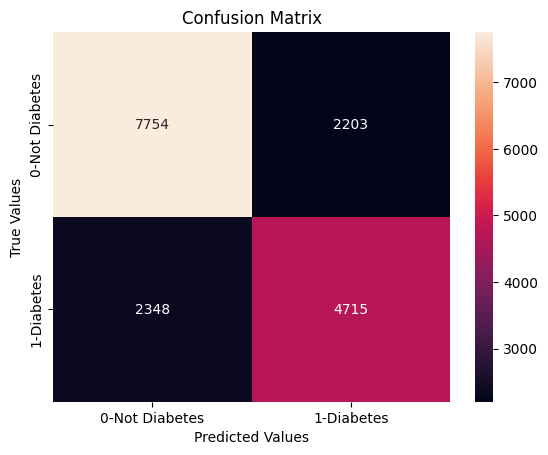

In [ ]:
# Tạo confusion_matrix
conf_matrix = confusion_matrix(y_test, y_test_pred)
sns.heatmap(conf_matrix, xticklabels=["0-Not Diabetes", "1-Diabetes"], yticklabels=["0-Not Diabetes", "1-Diabetes"], annot=True, fmt="d")
plt.title("Confusion Matrix")
plt.xlabel("Predicted Values")
plt.ylabel("True Values")
plt.show()